In [9]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import seaborn as sns

In [10]:
wine_dataset = load_wine()
print("Ключи набора данных wine:{} ".format(wine_dataset.keys()))

Ключи набора данных wine:dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']) 


In [11]:
print("Цели :{}".format(wine_dataset.target))
print ("Название целевых классов :{}".format(wine_dataset.target_names))
print ("Название признаков :{}".format(wine_dataset.feature_names))

Цели :[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Название целевых классов :['class_0' 'class_1' 'class_2']
Название признаков :['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [12]:
print("Описание :{}".format(wine_dataset.DESCR))

Описание :.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    

In [13]:
print("Форма набора данных: {}".format(wine_dataset['data'].shape))
print("Данные: {}".format(wine_dataset.data))

Форма набора данных: (178, 13)
Данные: [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(wine_dataset['data'], wine_dataset['target'], random_state=0)
print("Форма массива X_train: {}".format(X_train.shape))
print("Форма массива y_train: {}".format(y_train.shape))
print("Форма массива X_test: {}".format(X_test.shape))
print("Форма массива y_test: {}".format(y_test.shape))

Форма массива X_train: (133, 13)
Форма массива y_train: (133,)
Форма массива X_test: (45, 13)
Форма массива y_test: (45,)


In [21]:
df = pd.DataFrame(X_train, columns=wine_dataset.feature_names)
df.head(4)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0
1,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695.0
2,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0
3,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0


In [29]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,PCA1,PCA2
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02,1.780000e+02
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202,-6.131425e-14,-3.073696e-15
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035,3.149632e+02,1.313527e+01
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000,-4.690594e+02,-2.750404e+01
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000,-2.461400e+02,-8.330383e+00
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000,-7.352540e+01,-3.269233e+00
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000,2.385654e+02,5.449197e+00
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000,9.331184e+02,5.879376e+01


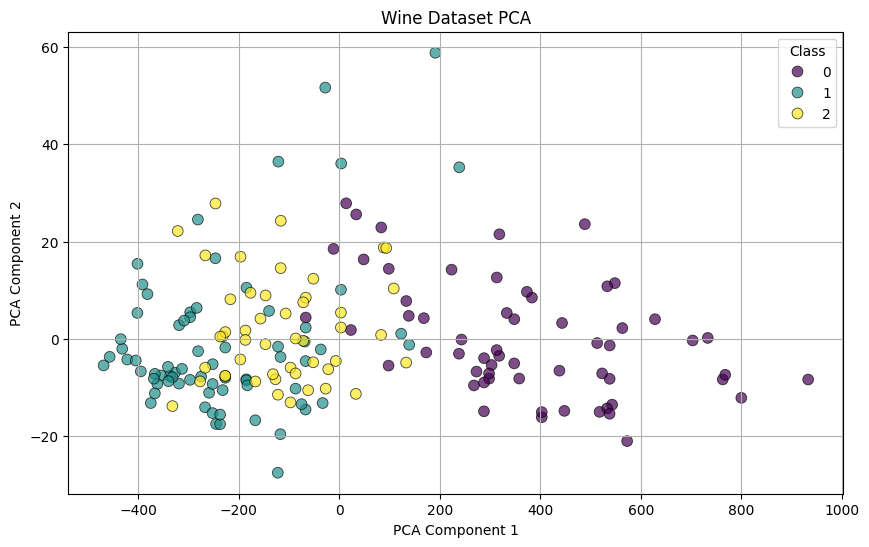

In [30]:
df = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)
df['class'] = wine_dataset.target

# Применение PCA для уменьшения размерности до 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(wine_dataset.data)

# Добавляем результаты PCA в DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Визуализация данных в 2D-пространстве, цветами отображаются классы
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='class',
                palette='viridis', data=df, s=60, alpha=0.7, edgecolor='k')
plt.title('Wine Dataset PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Class')
plt.grid(True)
plt.show()

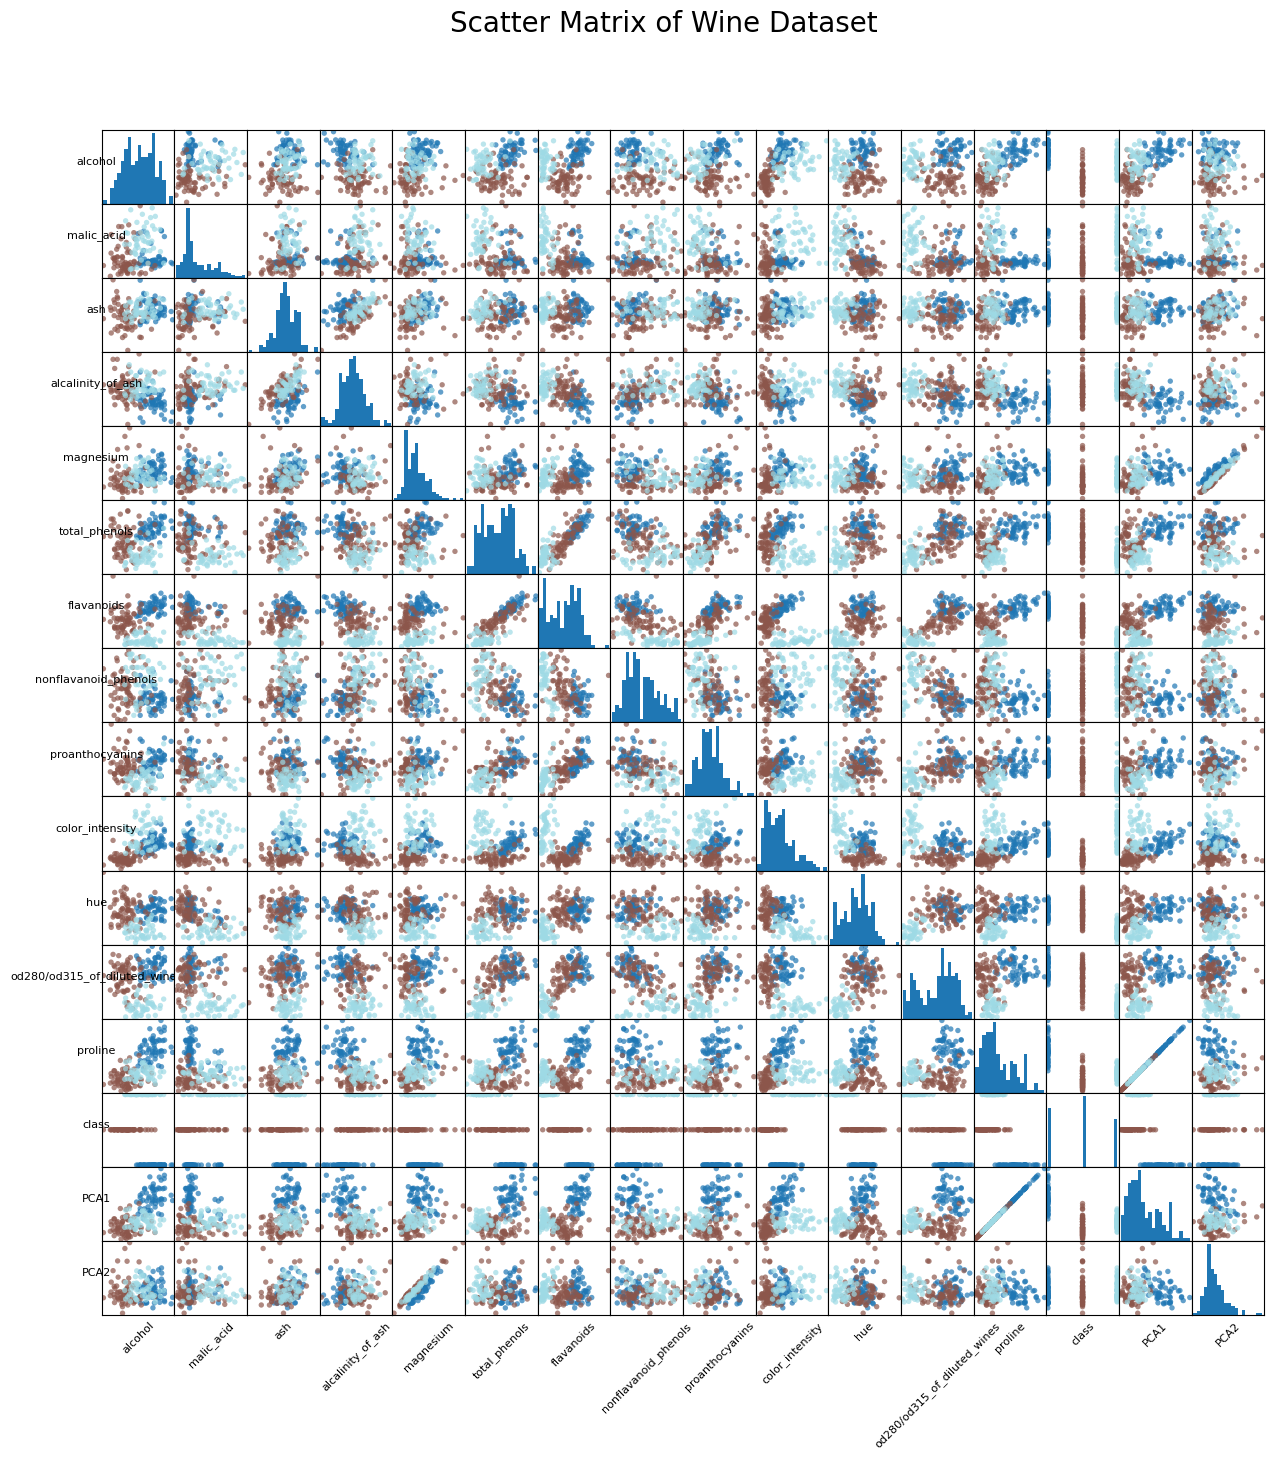

In [31]:
y = wine_dataset.target
grr = pd.plotting.scatter_matrix(df, c=y, figsize=(15, 15), marker='.',
                                 hist_kwds={'bins': 20}, s=60, alpha=0.7,
                                 cmap='tab20')
plt.suptitle('Scatter Matrix of Wine Dataset', fontsize=20)
plt.subplots_adjust(top=0.9)

for ax in grr.flatten():
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.xaxis.label.set_fontsize(8)
    ax.yaxis.label.set_fontsize(8)
    ax.set_xticks([])
    ax.set_yticks([])


plt.show()

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора: \n {}".format(y_pred))
print("Правильность на тестовом наборе: {:.2f}".format(
    knn.score(X_test, y_test)))
print("Правильность на тестовом наборе в процентах: {:.2f}".format(
    knn.score(X_test, y_test)*100))

Прогнозы для тестового набора: 
 [0 1 1 0 1 1 0 2 1 1 0 1 0 2 1 1 0 0 1 0 1 0 1 1 0 1 1 1 2 2 0 0 2 0 0 0 2
 1 1 1 2 0 1 1 1]
Правильность на тестовом наборе: 0.76
Правильность на тестовом наборе в процентах: 75.56
